Library imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.basemap import Basemap

Data Preprocessing - Map coordinates are first extracted and the rest of the table is converted to numpy n-d array.

Bad flag "-10000000000000000608673814477275136" is replaced with 0 to denote no wind.

In [3]:
def get_cords(zonal_file,meridional_file):
    x = []
    y = []
    u = []
    v = []
    zonal_speeds_df = pd.read_csv(zonal_file)
    meridional_speeds_df = pd.read_csv(meridional_file)
    # print(meridional_speeds_df.head())
    y = list(zonal_speeds_df.columns.values)
    
    y.pop(0)
    y.pop(-1)
    # print(y)
    y_temp = y
    for i in range(len(y)):
        y[i] = y[i].strip()
        sign = 1
        if y[i][-1] == 'W':
            sign = -1
        y[i] = y[i][:len(y[i])-1]
        y[i] = sign*(float(y[i]))

    # print(y)

    x = list(zonal_speeds_df.iloc[:,0])
    for i in range(len(x)):
        x[i] = x[i].strip()
        sign = 1
        if x[i][-1] == 'S':
            sign = -1
        x[i] = x[i][:len(x[i])-1]
        x[i] = sign*(float(x[i]))

    # print(x)

    pd_temp = zonal_speeds_df.drop(columns=[zonal_speeds_df.columns.values[0]])
    pd_temp2 = meridional_speeds_df.drop(columns=[meridional_speeds_df.columns.values[0]])

    pd_temp = pd_temp.replace(-10000000000000000608673814477275136,0)
    pd_temp2 = pd_temp2.replace(-10000000000000000608673814477275136,0)
    # print(pd_temp.head())
    zonal_speed_np = pd_temp.drop(columns=[pd_temp.columns.values[-1]]).to_numpy()
    meridional_speed_np = pd_temp2.drop(columns=[pd_temp2.columns.values[-1]]).to_numpy()
    # print(zonal_speed_np)
    return (np.array(y),np.array(x),zonal_speed_np,meridional_speed_np)
    # return (x_cords,y_cords,u_val,v_val)


plot(x,y,u,v,title,save_name,normalize,skip_points)

x,y = map coordinates

u = zonal wind (n-d array)

v = meridional wind (n-d array)

save_name = name of the save file (of figure)

normalize = whether to turn all the arrow same length

skip_points = take every xth data

In [4]:
def plot(x,y,u,v,title,save_name,normalize=False,skip_points=5):
    plt.rcParams.update({'font.size': 15})
    fig=plt.figure(figsize=[19.21,10.80])
    ax=fig.add_axes([0.1,0.1,0.8,0.8])
    map = Basemap()
    # map = Basemap(projection='ortho', 
    #               lat_0=0, lon_0=0)

    #Fill the globe with a blue color 
    # map.drawmapboundary()
    map.drawcoastlines()
    # map.drawmeridians(x)
    #Fill the continents with the land color
    
    # print(x,y)
    speed = np.sqrt(u*u+v*v)
    F = 0.002

    if normalize:
        u = F*(u/speed)
        v = F*(v/speed)

    x, y = map(x, y)

    x,y = np.meshgrid(x, y)
    # print(len(points[0]),points[0][0])
    # yy = np.arange(0, len(y), 4)
    # xx = np.arange(0, len(x), 4)

    # points = np.meshgrid(yy, xx)
    # print(len(X),Y[0])
    skip = (slice(None, None, skip_points), slice(None, None, skip_points))
    scale = (0.1 if normalize else None)
    # draw parallels
    map.drawparallels(np.arange(-90,90,60),labels=[1,1,0,1])
    # draw meridians
    map.drawmeridians(np.arange(-180,180,90),labels=[1,1,0,1])
    # map.pcolormesh(x, y, speed,cmap=plt.cm.turbo)
    map.quiver(x, y, 
        u, v,speed,cmap=plt.cm.turbo)
    map.quiver(x[skip], y[skip], 
        u[skip], v[skip],color="black",
        width=0.001,scale=scale)
    map.fillcontinents(color='grey')
    cbar = plt.colorbar()
    cbar.ax.set_ylabel("wind speed")
    ax.set_title(title)
    # map.axis([-180,180,-90,90])
    # plt.show()
    plt.savefig(save_name)

C:\Users\todor\AppData\Local\Temp\ipykernel_23716\3601587212.py:20: RuntimeWarning: invalid value encountered in divide
  u = F*(u/speed)
C:\Users\todor\AppData\Local\Temp\ipykernel_23716\3601587212.py:21: RuntimeWarning: invalid value encountered in divide
  v = F*(v/speed)


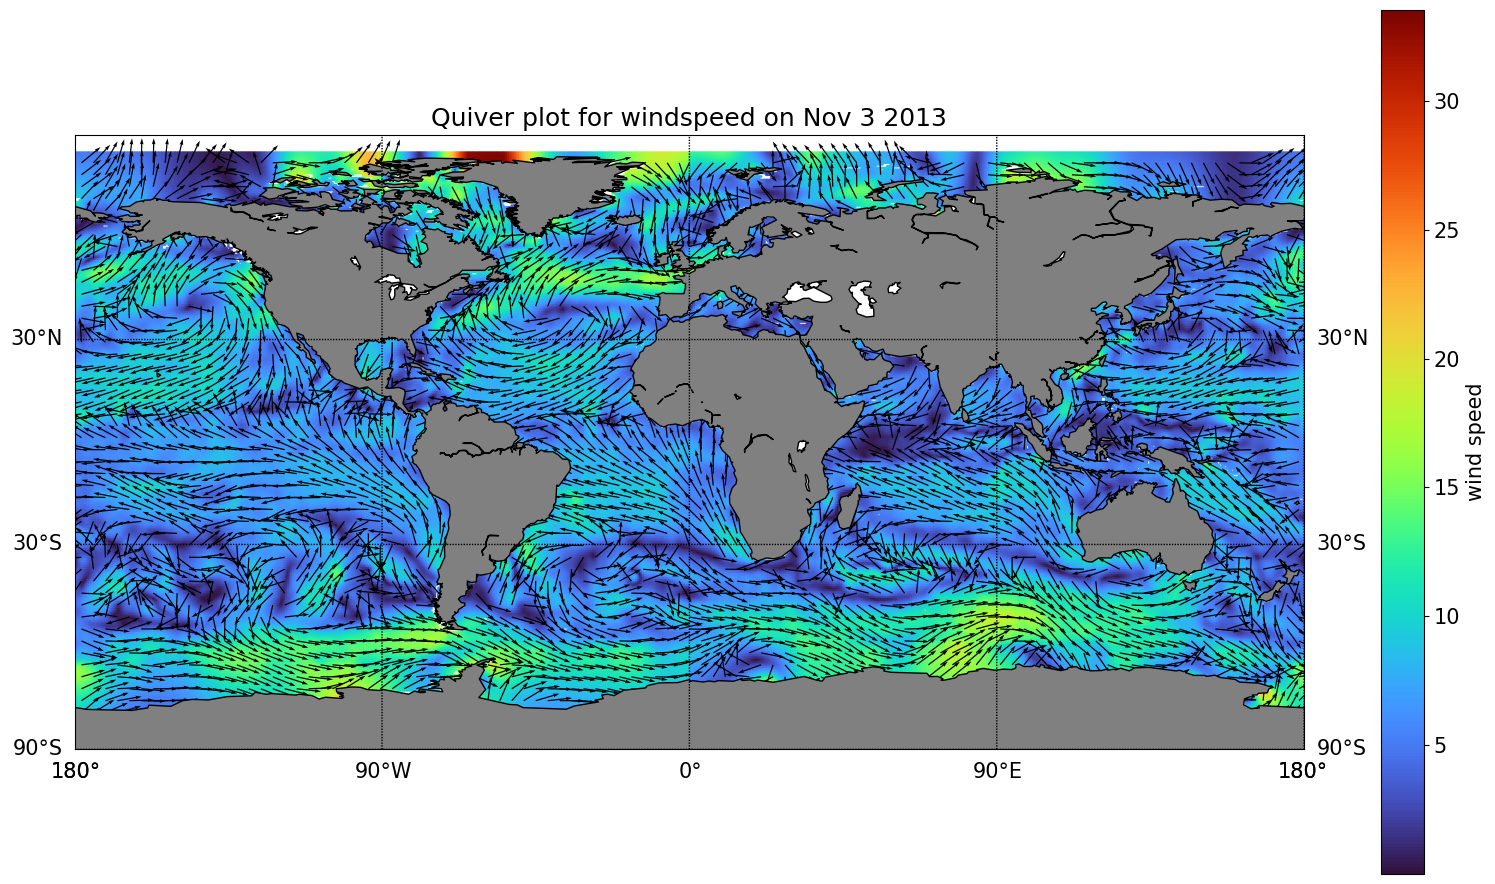

In [23]:
x,y,u,v=get_cords("Nov3_2013/Zonal_speed.csv", "Nov3_2013/Meridional_speed.csv")
plot(x,y,u,v,"Quiver plot for windspeed on Nov 3 2013","Nov3_7.png",True,7)